In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import rc
from matplotlib import animation
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import seaborn.apionly as sns
import matplotlib as mpl

import re
import os
import glob
import datetime
%matplotlib inline

In [2]:
rc('font', size=8)
rc('font', family='Arial')
rc('axes', linewidth=1)
rc('xtick.major', width=0.5, size=1.5)
rc('ytick.major', width=0.5, size=1.5)

In [3]:
colors = ['#F9ED69', '#F08A5D', '#B83B5E', '#6A2C70']
colors.reverse()

# Figure 6

In [4]:
run2 = pd.read_csv('../optimisations/run_II/runII.results.csv')
summary = pd.read_csv('../optimisations/optimisations.summary.csv', index_col=0)
run1 = pd.read_csv('../optimisations/run_I/runI.results.csv')

In [5]:
q = (run2.fobj - summary.ix['runII', 'f0']) / (summary.ix['runII', 'Delta'] + \
                                               abs(run2.fobj - summary.ix['runII', 'f0']))
delta = run2.fcon1 * 0
delta[run2.fcon1 >= summary.ix['runII', 'F2_1']] = (run2.fcon1[run2.fcon1 >= summary.ix['runII', 'F2_1']] - \
                                                    summary.ix['runII', 'F2_1'])**2 / summary.ix['runII', 'sigma1']**2
    
r = (2 * delta) / (1 + delta)

In [6]:
run2['q'] = q
run2['r'] = r

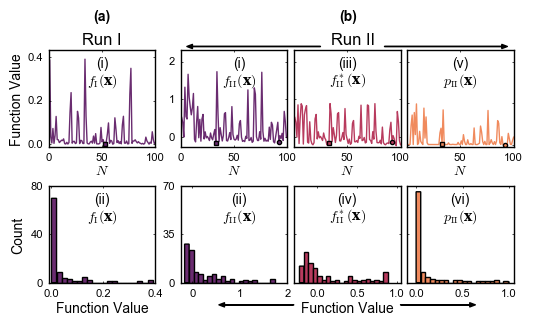

In [7]:
from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_family('serif')
font.set_weight('bold')

fig = plt.figure(figsize=(6, 3))
grid = GridSpec(6,25)
plot_df = pd.DataFrame()
plot_df['f2'] = run2.f
plot_df['fcon1'] = run2.fcon1 
plot_df['q2'] = run2.q
plot_df['r2'] = run2.r
plot_df['f1'] = run1.f

keys = ['f1', 'f2', 'q2', 'r2']
labels = ['$f_{\mathrm{I}}($x$)$', '$f_{\mathrm{II}}($x$)$', '$f^*_{\mathrm{II}}($x$)$', '$p_{\mathrm{II}}($x$)$']
colors = colors

ymins1 = [-0.01, -0.25, -0.25, -0.05]
ymaxs1 = [0.43, 2.3, 2.3, 2.3]
ymins2 = [0, 0, 0, 0]
ymaxs2 = [80, 70, 70, 70]

xmins2 = [-0.01, -0.25, -0.3, -0.1]
xmaxs2 = [0.4, 2, 1.05, 1.05]

yticks1 = [[0, 0.2, 0.4], 
           [0, 1, 2],
           [0, 1, 2], 
           [0, 1, 2]]
yticks2 = [[0, 40, 80],
           [0, 35, 70],
           [0, 35, 70],
           [0, 35, 70]]

xticks2 = [[0, 0.2, 0.4],
           [0, 1, 2],
           [0, 0.5, 1],
           [0, 0.5, 1]]

label_x1 = [0.5, 0.55, 0.5, 0.5]
label_x2 = [0.5, 0.55, 0.5, 0.5]
labels_i1 = ['i', 'i', 'iii', 'v']
labels_i2 = ['ii', 'ii', 'iv', 'vi']

for i in range(4):
    if i <= 0:
        ax1 = plt.subplot(grid[:3, i:i+6])
        ax2 = plt.subplot(grid[3:, i:i+6])
        color = colors[0]
    else:
        ax1 = plt.subplot(grid[:3, (i*6)+1:(i*6)+7])
        ax2 = plt.subplot(grid[3:, (i*6)+1:(i*6)+7])
        color = colors[i-1]
        
    ax1.plot(plot_df[plot_df[keys[i]].notnull()].index + 1, 
             plot_df[keys[i]][plot_df[keys[i]].notnull()], color=color, lw=1)
    sns.distplot(plot_df[keys[i]][plot_df[keys[i]].notnull()], kde=False, color=color, 
                 axlabel=False, bins=20, ax=ax2, label=labels[i], hist_kws={'alpha': 1})
    ax2.annotate(labels[i], xy=(label_x2[i], 0.65), xycoords='axes fraction', 
                 fontsize=10, ha='center', fontproperties=font)
    ax1.annotate(labels[i], xy=(label_x1[i], 0.65), xycoords='axes fraction', 
                 fontsize=10, ha='center', fontproperties=font)
    
    if i == 0:
        jbest = plot_df[plot_df.f1 == plot_df.f1.min()].index.values[0]
        ax1.plot(jbest+1, plot_df.f1.min(), 's', mfc=colors[i], mew=1, markersize=3)
    else:
        jbest = plot_df[plot_df.f2 == plot_df.f2.min()].index.values[0]
        jsoft = plot_df[plot_df.f2 == \
                        plot_df.f2[plot_df.fcon1 <= summary.ix['runII', 'F2_1']].min()].index.values[0]
        ax1.plot(jbest+1, plot_df[keys[i]].iloc[jbest], 's', mfc=color, mew=1, markersize=3)
        ax1.plot(jsoft+1, plot_df[keys[i]].iloc[jsoft], 'o', mfc=color, mew=1, markersize=3)
    
    ax1.set_ylim(ymins1[i], ymaxs1[i])
    ax1.set_xlim(0, 100)
    if i > 1:
        ax1.set_xticks([50, 100])
    else:
        ax1.set_xticks([0, 50, 100])
        
    ax1.set_yticks(yticks1[i])
    ax2.set_yticks(yticks2[i])
    ax2.set_xticks(xticks2[i])
    
    ax2.set_xlim(xmins2[i], xmaxs2[i])
    ax2.set_ylim(ymins2[i], ymaxs2[i])
    if i > 1:
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])
    
    ax1.set_xlabel('$N$', fontsize=10, labelpad=1)
    
    if i == 0:
        ax2.set_xlabel('Function Value', fontsize=10, labelpad=2)
        ax2.set_ylabel('Count', fontsize=10, labelpad=3.5)
        ax1.set_ylabel('Function Value', fontsize=10, labelpad=2.5)
        
    if i == 2:
        ax2.set_xlabel('Function Value', fontsize=10, labelpad=2)
        
        ax2.annotate('', xy=(1.7, -0.23), xytext=(1, -0.23), xycoords='axes fraction', textcoords='axes fraction',
                     arrowprops=dict(facecolor='black', width=0.1, headwidth=3, headlength=4))
        ax2.annotate('', xy=(-0.7, -0.23), xytext=(0, -0.23), xycoords='axes fraction', textcoords='axes fraction',
                     arrowprops=dict(facecolor='black', width=0.1, headwidth=3, headlength=4))
 
        ax2.annotate('', xy=(2, 2.45), xytext=(0.85, 2.45), xycoords='axes fraction', textcoords='axes fraction',
                     arrowprops=dict(facecolor='black', width=0.1, headwidth=3, headlength=4))
        ax2.annotate('', xy=(-1, 2.45), xytext=(0.25, 2.45), xycoords='axes fraction', textcoords='axes fraction',
                     arrowprops=dict(facecolor='black', width=0.1, headwidth=3, headlength=4))
        
    ax1.annotate('({})'.format(labels_i1[i]), xy=(label_x1[i], 0.87), 
                 xycoords='axes fraction', fontsize=10, ha='center', va='center')
    ax2.annotate('({})'.format(labels_i2[i]), xy=(label_x2[i], 0.87), 
                 xycoords='axes fraction', fontsize=10, ha='center', va='center')
        
fig.text(0.595, 0.92, 'Run II', fontsize=12)
fig.text(0.18, 0.92, 'Run I', fontsize=12)

fig.text(0.2, 1, '(a)', fontsize=10, fontweight='bold')
fig.text(0.61, 1, '(b)', fontsize=10, fontweight='bold')
        
grid.update(hspace=7, wspace=0.5)